## Analytical explationation should be added here...

$ {\large \text{1D Heat equation with Dirichlet boundary condition:}}$


$
{\large \hspace{40mm} 
\begin{cases} 
\text{Equation:} \qquad u_t = \alpha u_{xx} \quad \text{for} \quad 0 \leq x \leq L \quad\text{and}\quad 0 \leq t \leq T \\ \\
\text{Boundary Conditions:}\qquad u(t,0)=0, \quad\text{and}\quad u(t,0)=0 \\ \\
\text{Iinitial Condition:}\qquad u(0,x)=f(x)
\end{cases} 
}
$

$ {\large \text{Example's Informatio:}\\ }$
$$ {\large \begin{cases} 
L=1{\text{[m]}}\\ \\
u(0,t)=f(x)=\sin(2\pi x)+0.1\sin(20\pi x) \end{cases} }$$

$ {\large \text{Code for plotting the IC:} }$

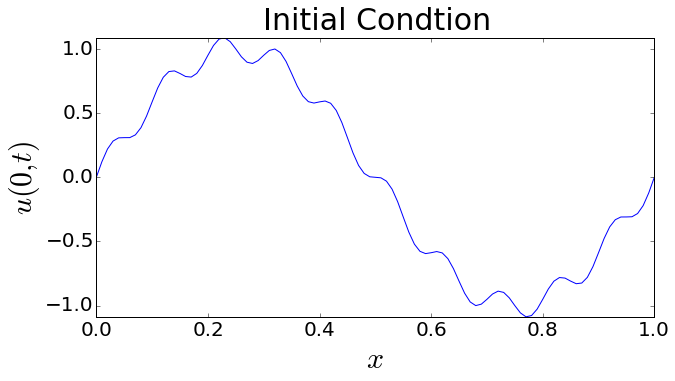

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Plotting Jazz
%matplotlib inline
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

# Defining x
L = 1
nx = 100
x = np.linspace(0, L, nx + 1)

# Creating u(0, t) as u0
u0 = np.sin(2 * np.pi * x) + 0.1 * np.sin( 20 * np.pi * x)

# Plot the IC
fig01 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.axes(xlim=(0, L), ylim=(min(u0), max(u0)))
ax.plot(x, u0)

ax.set_title("Initial Condtion", fontsize=30, y=1.01)
ax.set_xlabel('$x$', fontsize=30)
ax.set_ylabel('$u(0,t)$', fontsize=30)

plt.show()

${\large \text{Numerical method} \rightarrow  \text{Forward Euler:}}$

${\large \hspace{10mm} \text {1. First order forward difference in time.}}$

${\large \hspace{10mm} \text {2. Second order central difference in space.}}$

$$
{\large
\begin{equation}
\frac{u^{n+1}_i-u^{n}_i}{\Delta t} = \alpha\frac{u^{n}_{i+1}-2u^{n}_{i+}+u^{n}_{i-1}}{\Delta x ^2},
\end{equation}  
}
$$
${\large \text{which builds $u^{n+1}_i$ as following:}}$
$$
{\large
\begin{equation}
u^{n+1}_i= u^{n}_i + C\big(u^{n}_{i+1}-2u^{n}_{i+}+u^{n}_{i-1}\big)\quad \text{with} \quad C=\frac{\alpha \Delta t}{\Delta x ^2}
\end{equation}  
}
$$

### $\text{Code to solve the equation:}$

In [2]:
# Spatial mesh
L = 1
Nx = 100
x = np.linspace(0, L, Nx + 1)
dx = x[1] - x[0]

#  Thermal diffusivity of Gold = 1.27 * 10 ** -4
alpha = 1.27 * 10 ** -4
#  Thermal diffusivity of Iron = 2.3 * 10  ** -5
# alpha = 2.3 * 10 ** -5

# Temporal mesh
T = 700
Nt = 2000
t = np.linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]
C = alpha * dt / dx**2

print "T, dx, dt, C =  %.1f, %.3f, %.3f, %.3f" % (T, dx, dt, C)

# IC 
u = np.sin(2 * np.pi * x) + 0.1 * np.sin(20 * np.pi * x)

u_sol = []
for n in range(Nt):
    un = u.copy()
    u_sol.append(un)
    # Solving the problem everywhere except at the boundaries
    for i in range(1, Nx):
        u[i] = un[i] + C * (un[i + 1] - 2 * un[i] + un[i - 1])
    # Adding the boundary values
    u[0] = 0
    u[Nx] = 0

T, dx, dt, C =  700.0, 0.010, 0.350, 0.444


${\large \text {Code for Downsampling the results for plotting reasons:} }$

In [3]:
# spatial downsampling
spatial_downsampling_amount = 1 # not actually done since it makes things look very coarse
x_d = x[::spatial_downsampling_amount]
u_sol_d = [u_sol_i[::spatial_downsampling_amount] for u_sol_i in u_sol]

# temporal downsampling
temporal_downsampling_threshold = 0.01 # lower number means more points (less downsampling)

u_sol_DS = [u_sol_d[0]]
# timestamps of picked solution arrays these can be overlaid on the plot to show at what point we are
times = [0]
for time, sol_array in enumerate(u_sol_d):
    if np.sum((sol_array - u_sol_DS[-1])**2) > temporal_downsampling_threshold:
        u_sol_DS.append(sol_array)
        times.append(time)

${\large \text{Analytical solution:} }$ 

$$
{\large
\begin{equation}
u(x,t)=e^{−4\pi^2t} \sin(2\pi x) + 0.1e^{−20^2\pi^2t}\sin(20\pi x)
\end{equation}
}
$$

${\large \text {Code for generating the analytical solution:} }$

In [4]:
# Spatial mesh
L = 1
Nx = 100
x = np.linspace(0, L, Nx + 1)

# Temporal mesh
T = 700
Nt = 2000
t = np.linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]

#  Thermal diffusivity of Gold = 1.27 * 10 ** -4
alpha = 1.27 * 10 ** -4

# IC 
u = np.sin(2 * np.pi * x) + 0.1 * np.sin(20 * np.pi * x)

u_a = []  # Analytical Solution

for n in times:
    t = n * dt
    un = u.copy()
    u_a.append(un)
    u = np.exp(-alpha * (2 * np.pi) ** 2 * t) *  np.sin(2 * np.pi * x) + 0.1 * np.exp(-alpha * (20 * np.pi) ** 2 * t) * np.sin(20 * np.pi * x) 

${\large \text{Code for animating the results:} }$


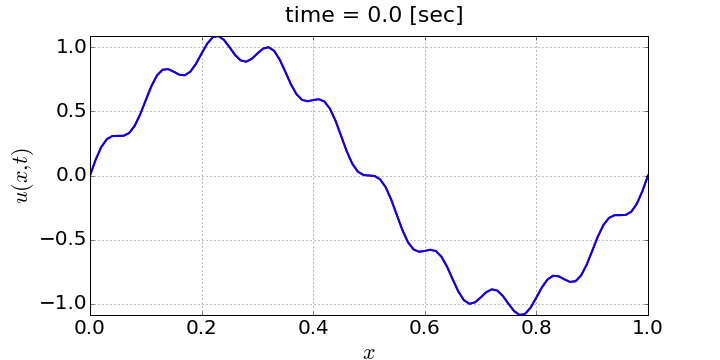
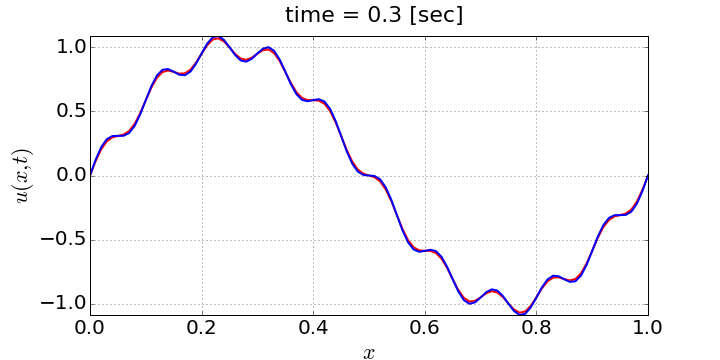
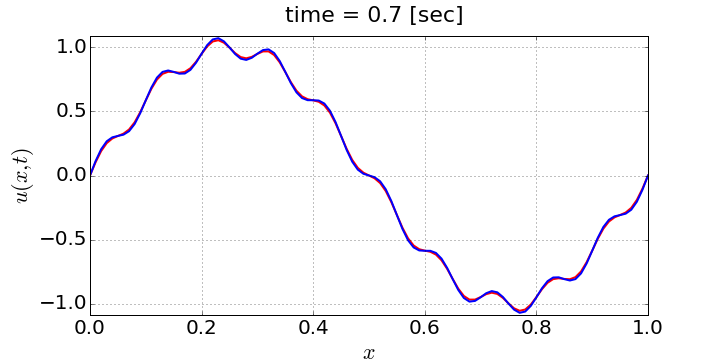
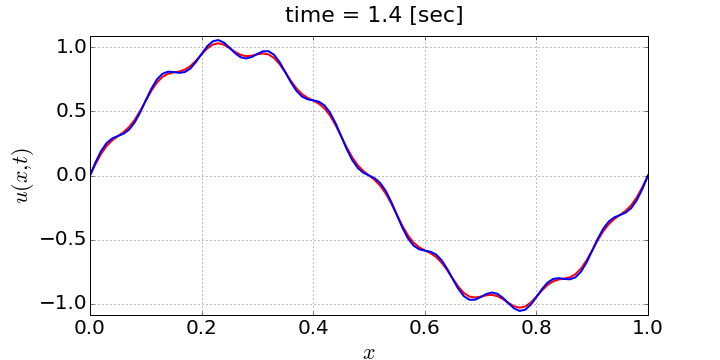
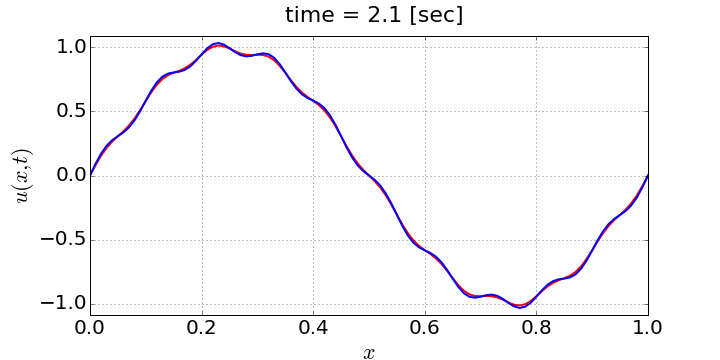
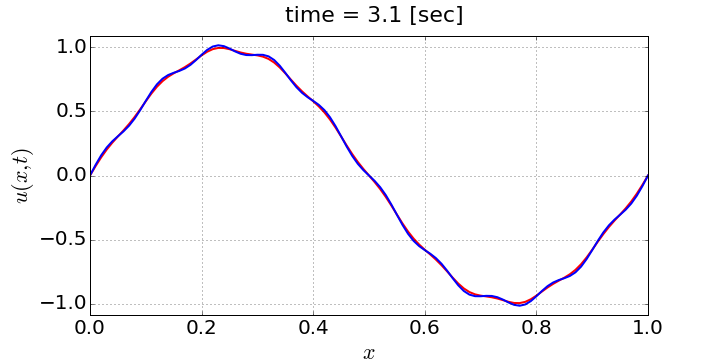
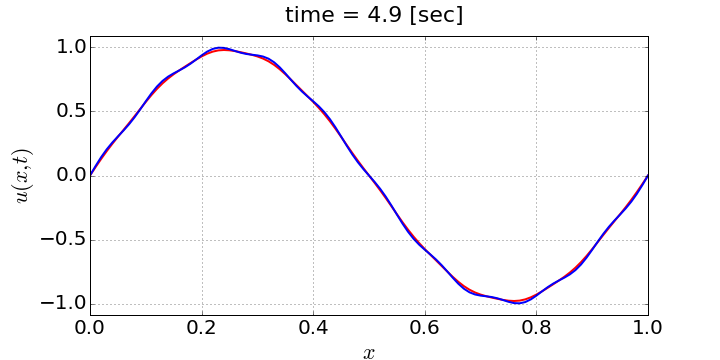
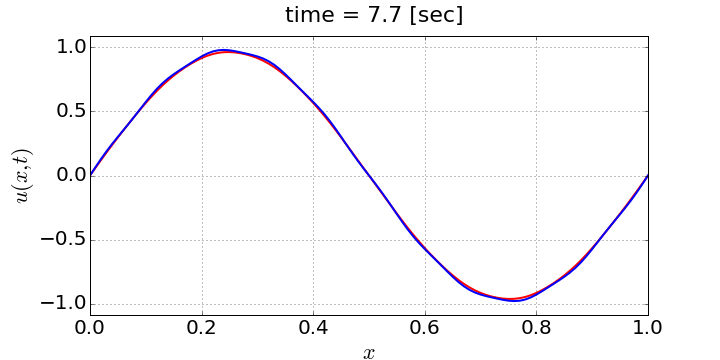
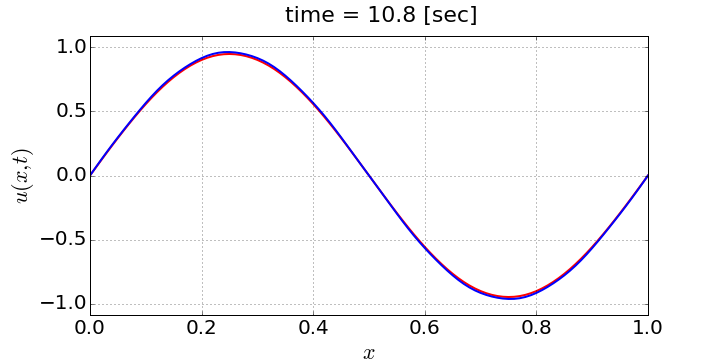
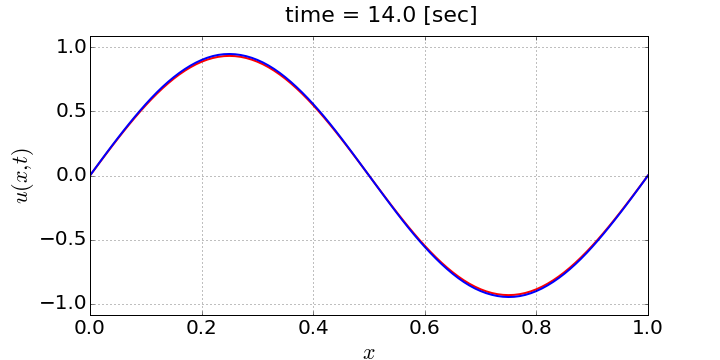
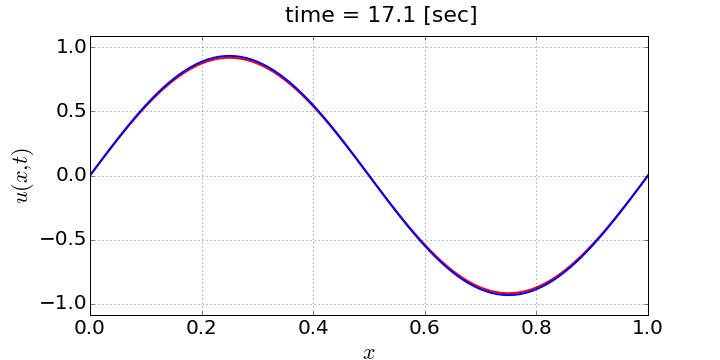
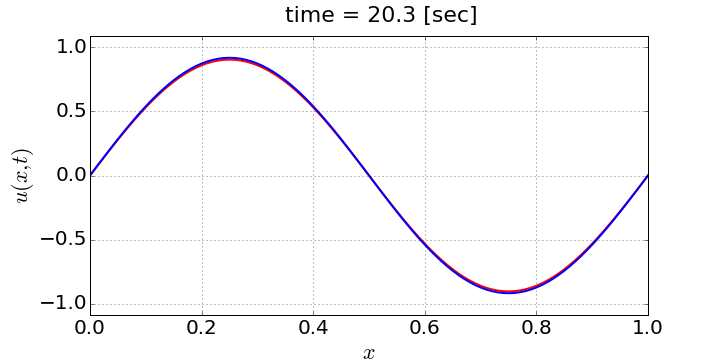
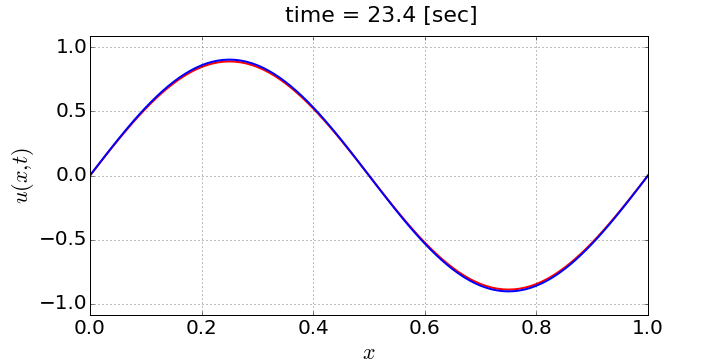
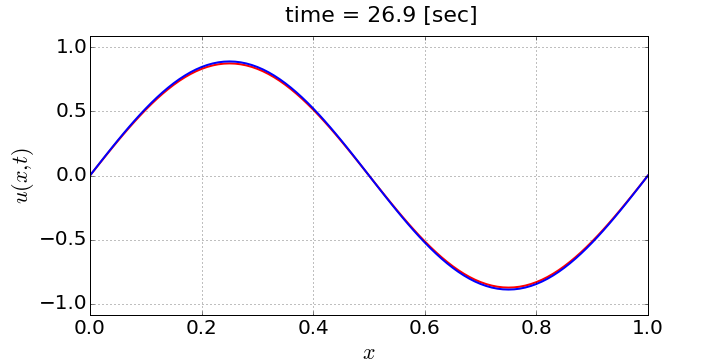
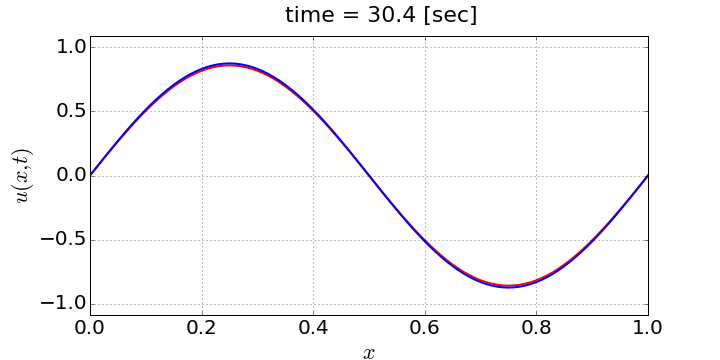
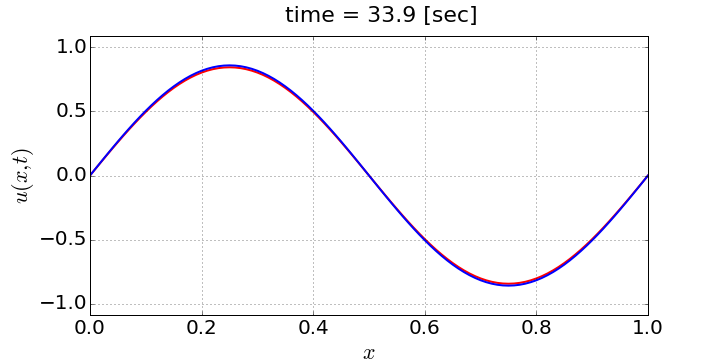
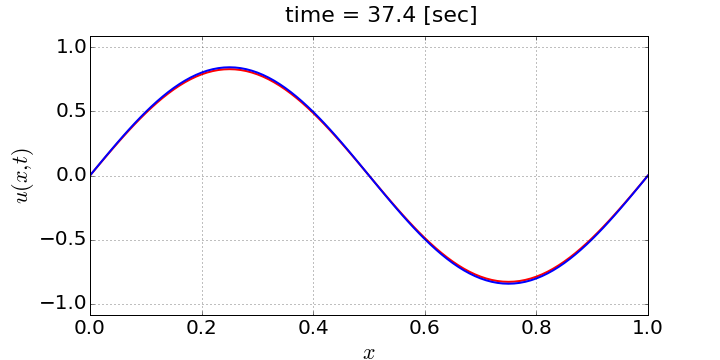
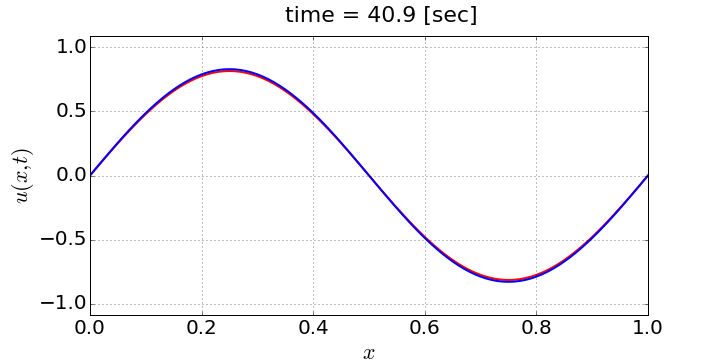
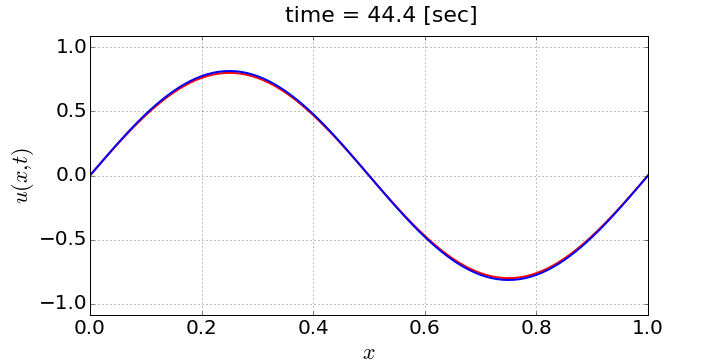
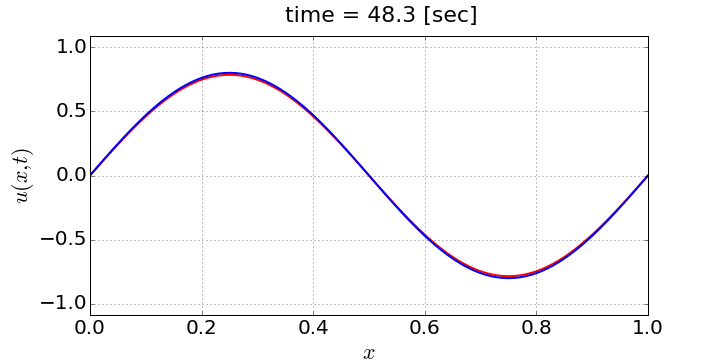
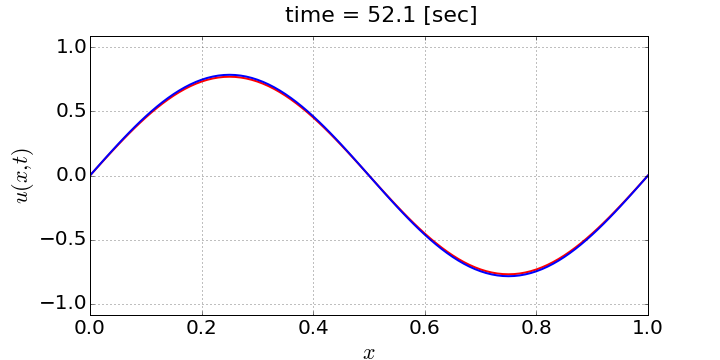
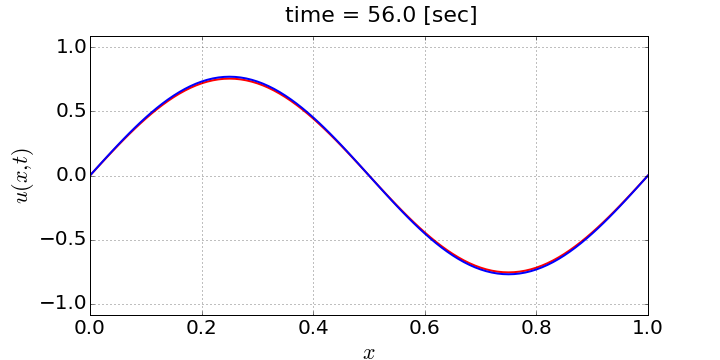
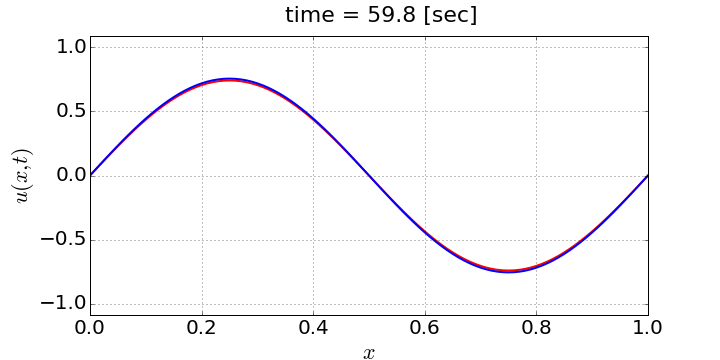
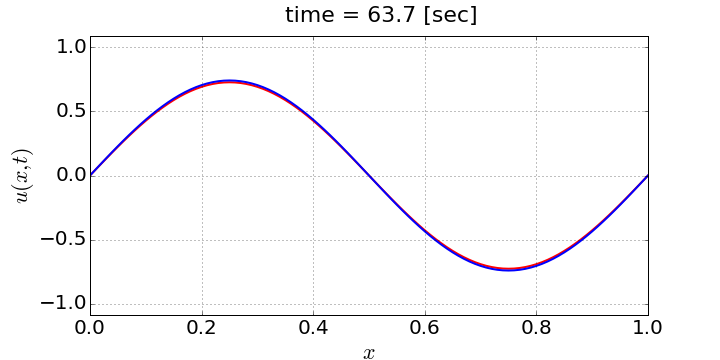
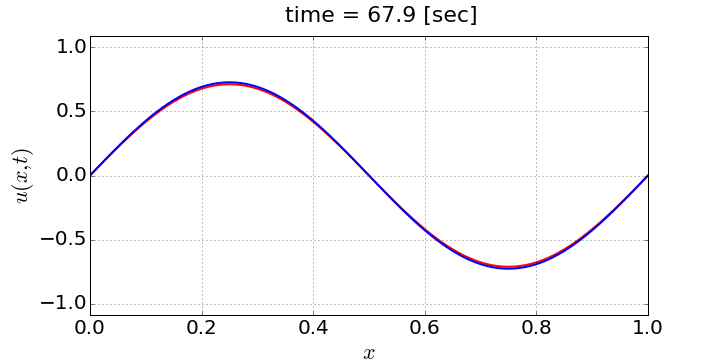
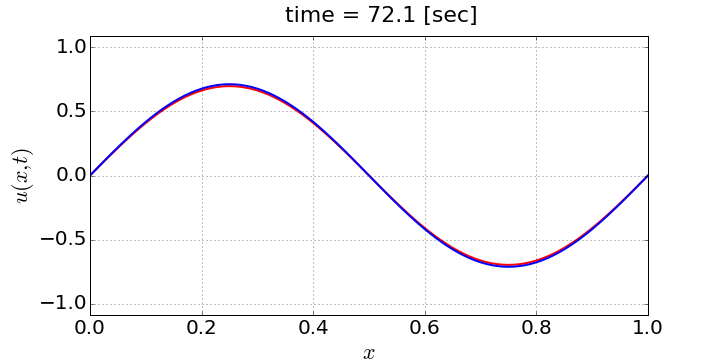
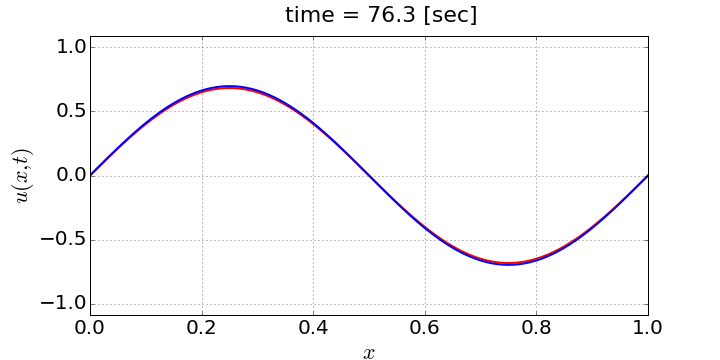
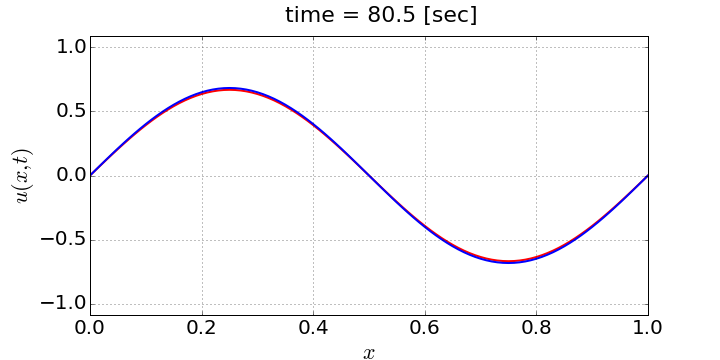
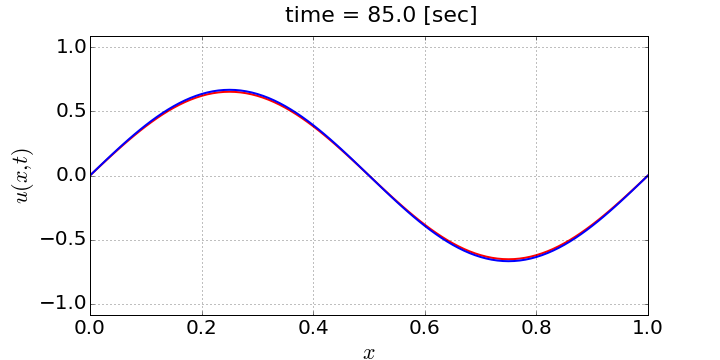
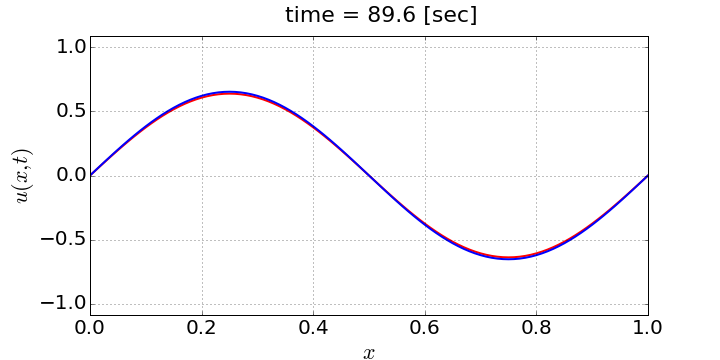
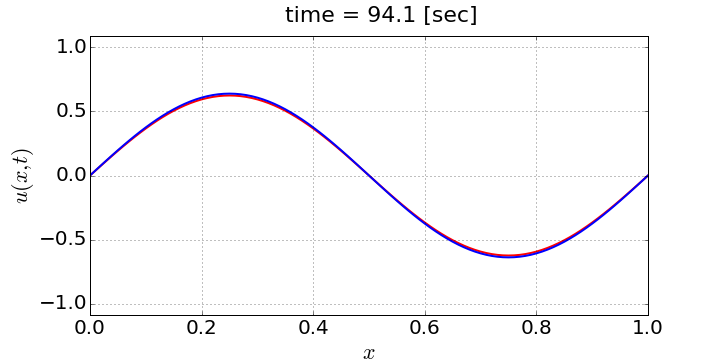
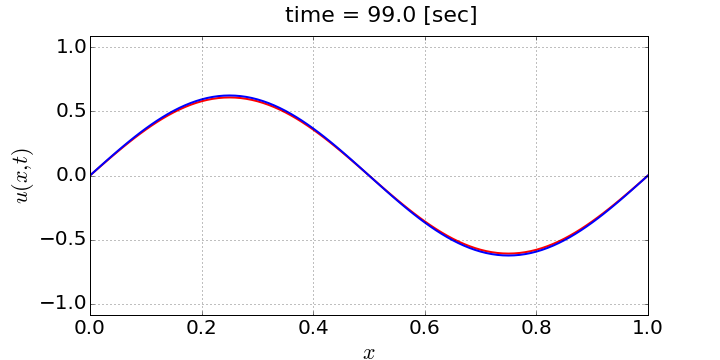
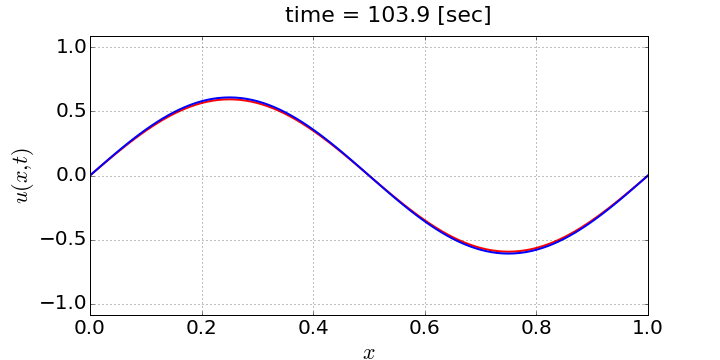
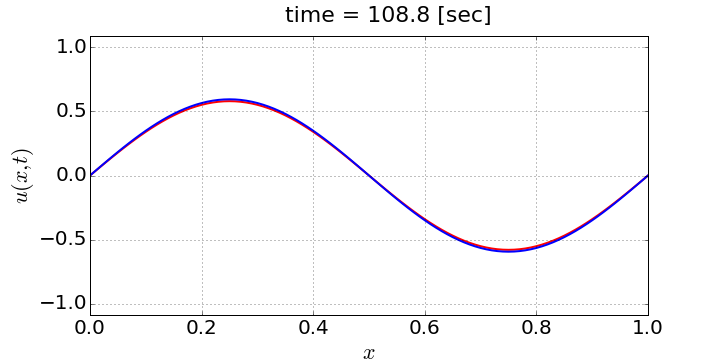
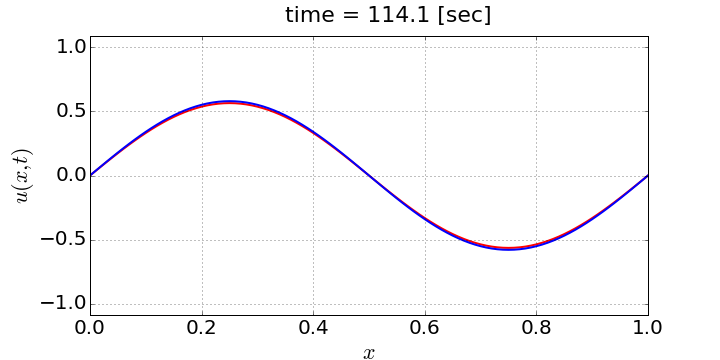
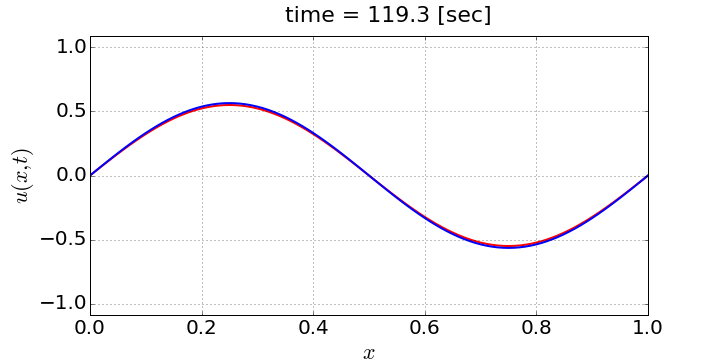
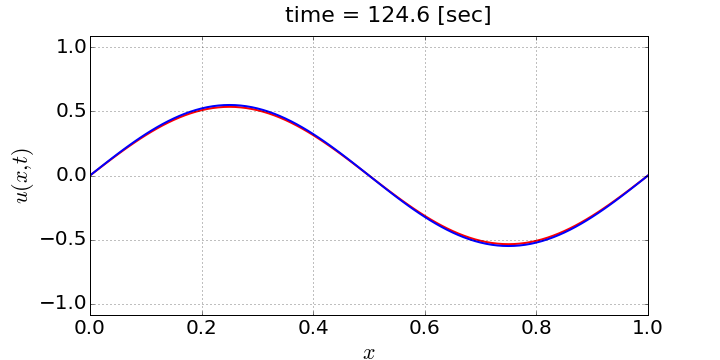
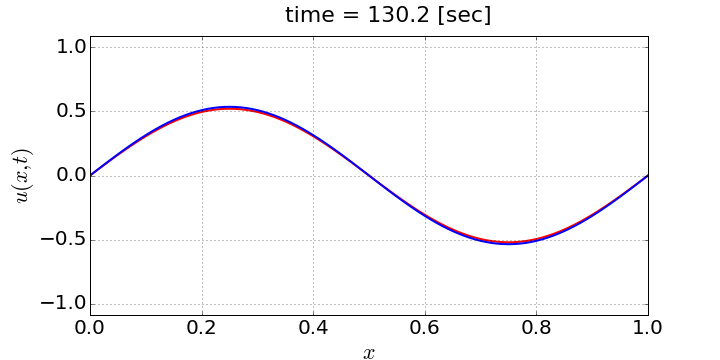
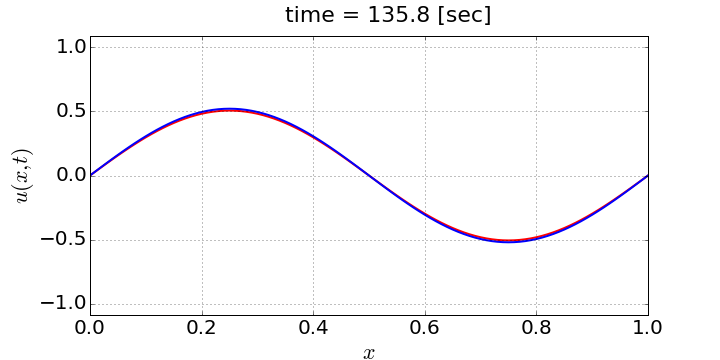
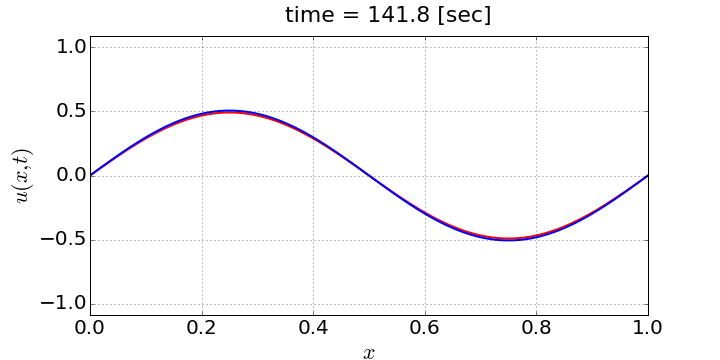
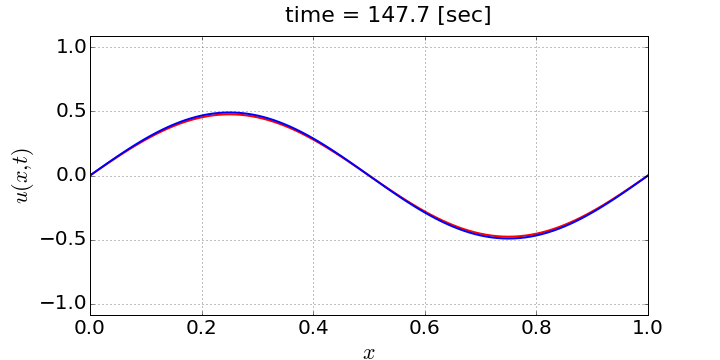
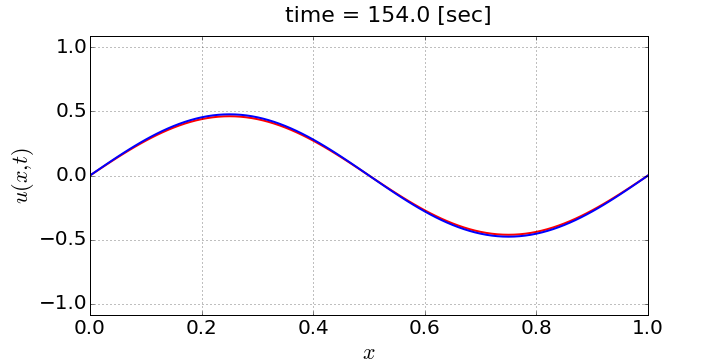
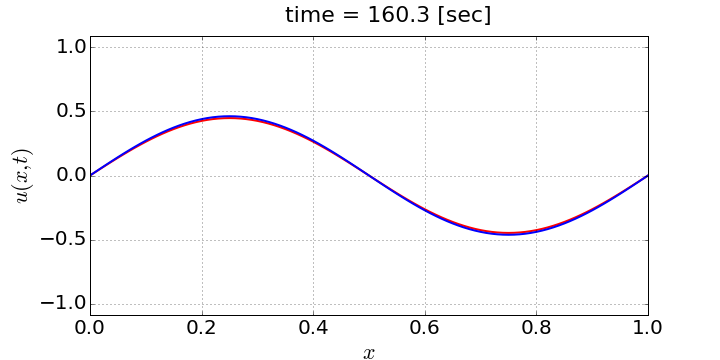
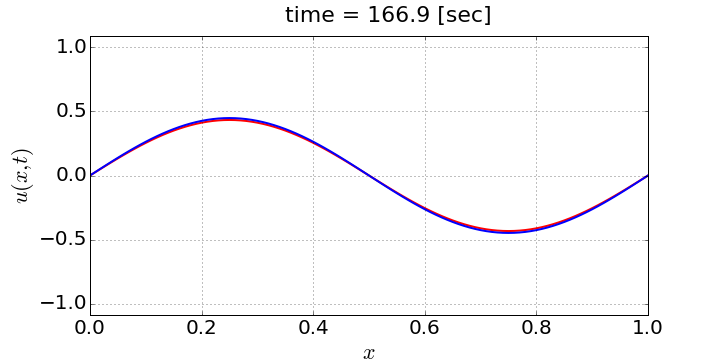
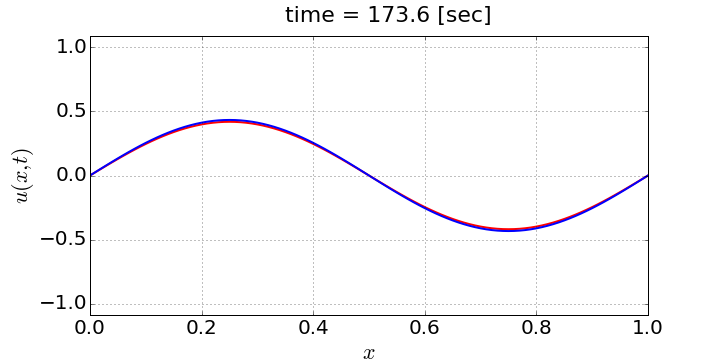
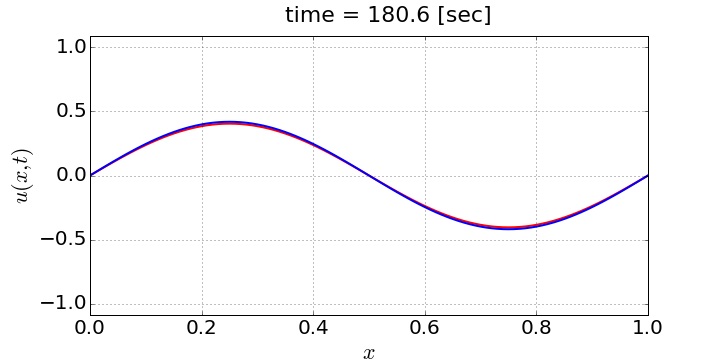
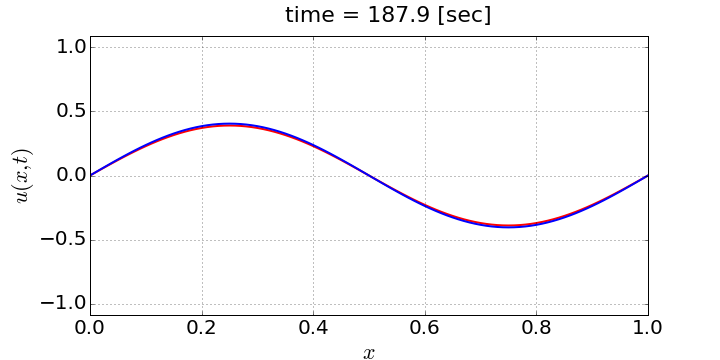
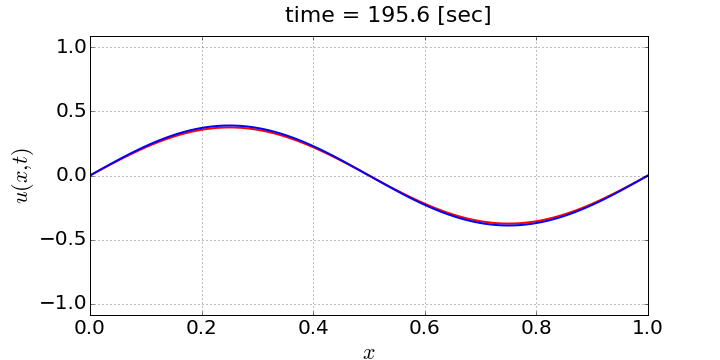
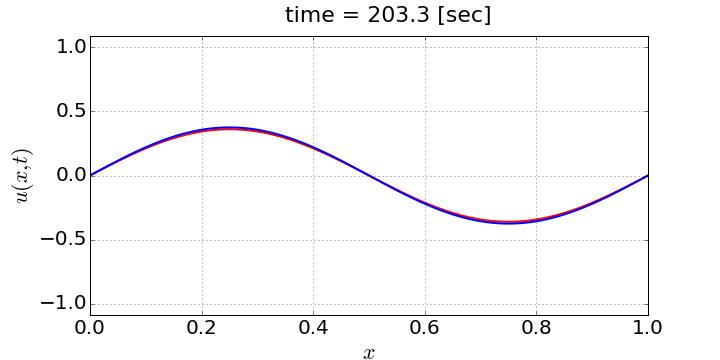
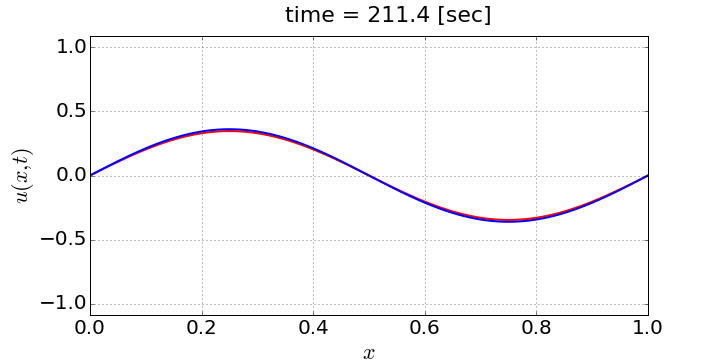
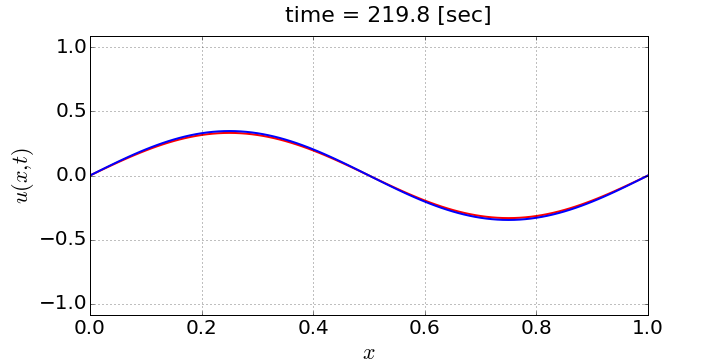
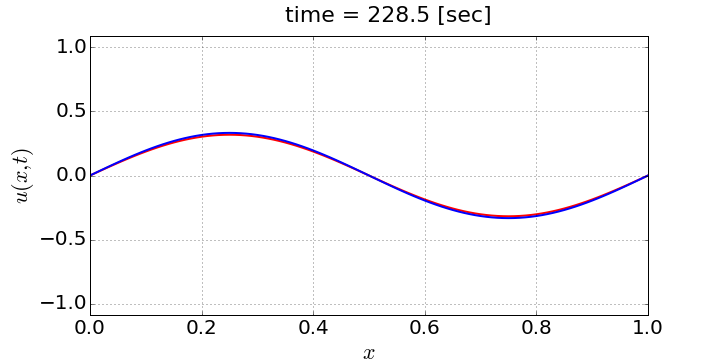
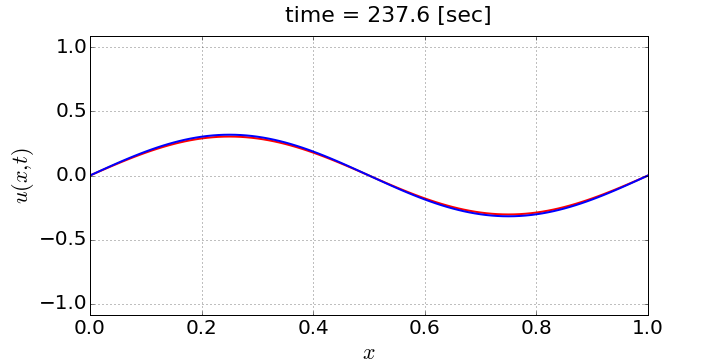
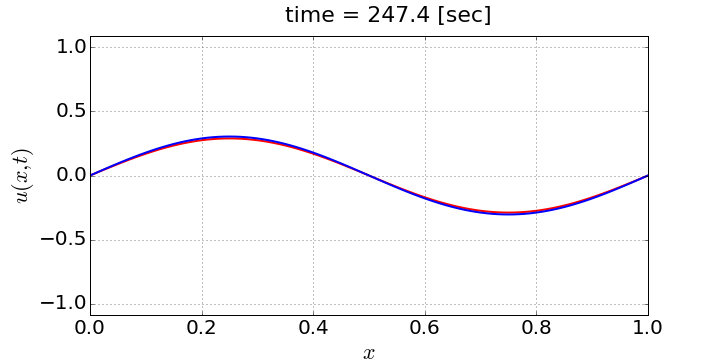
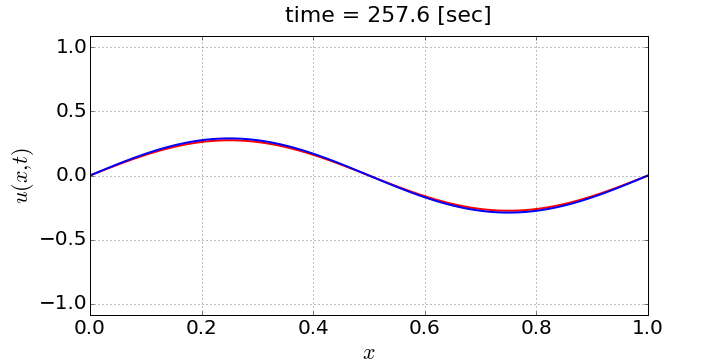
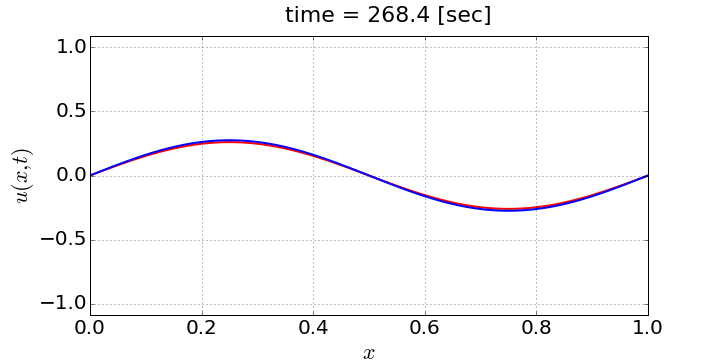
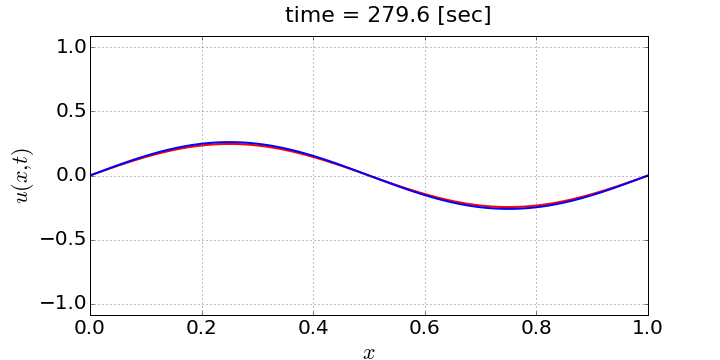
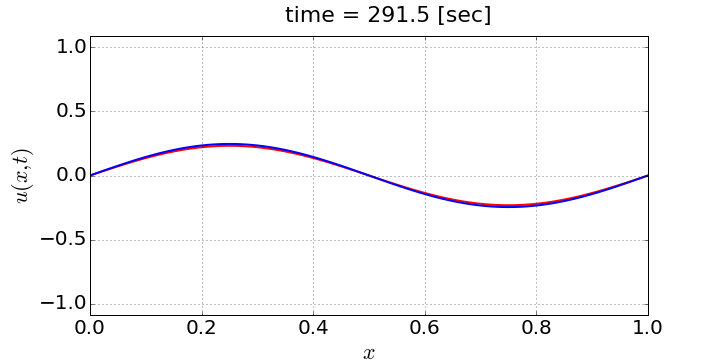
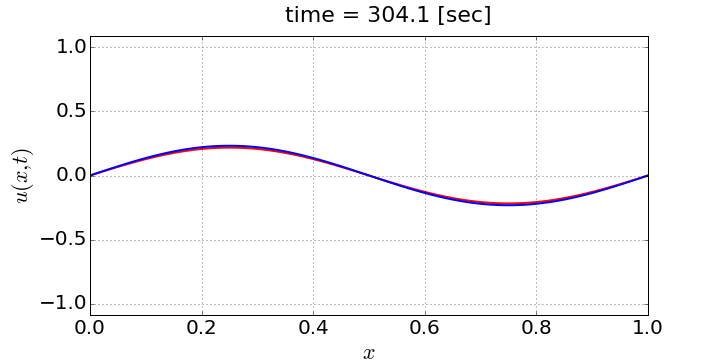
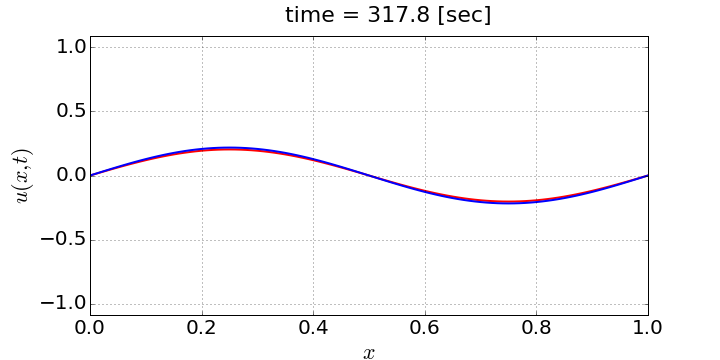
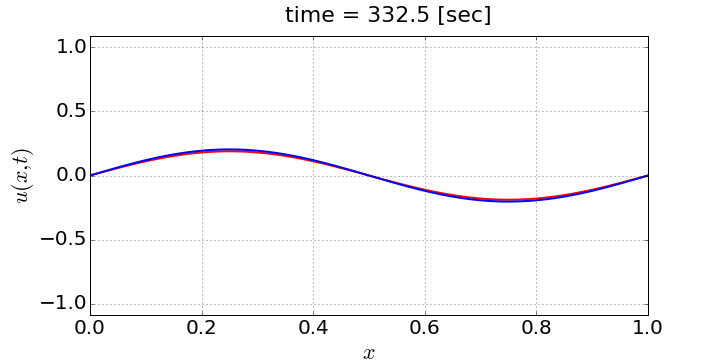
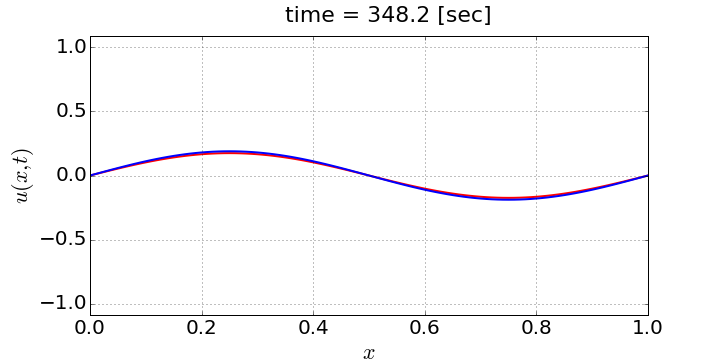
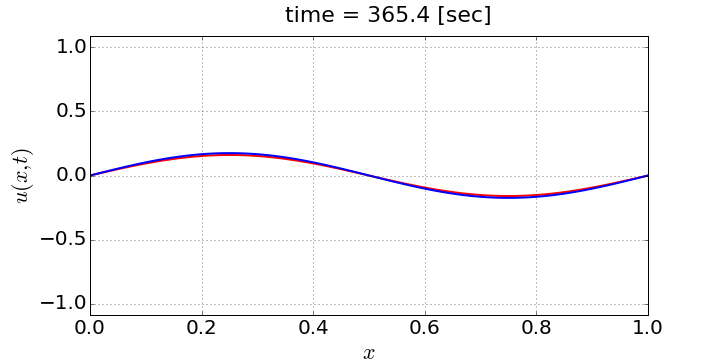
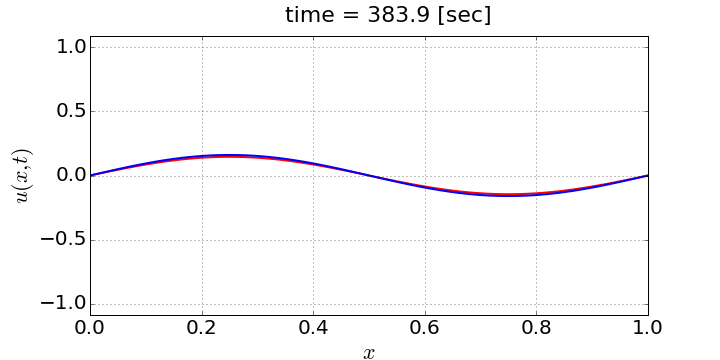
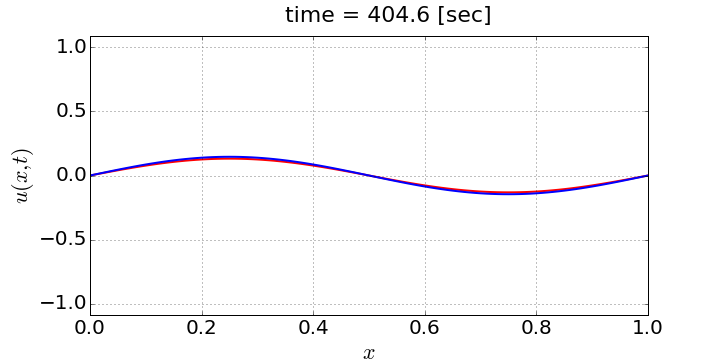
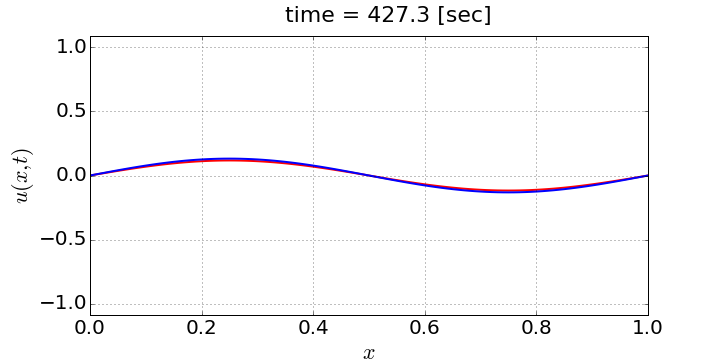
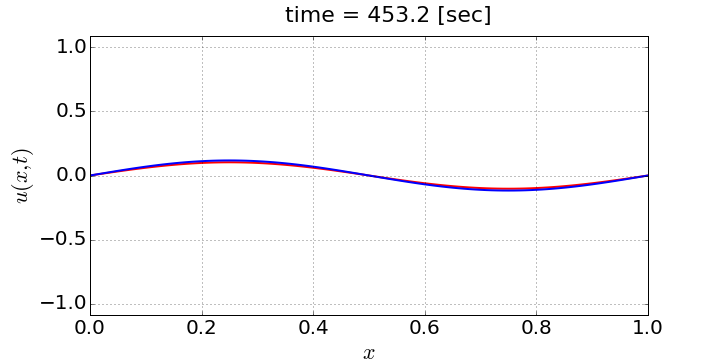
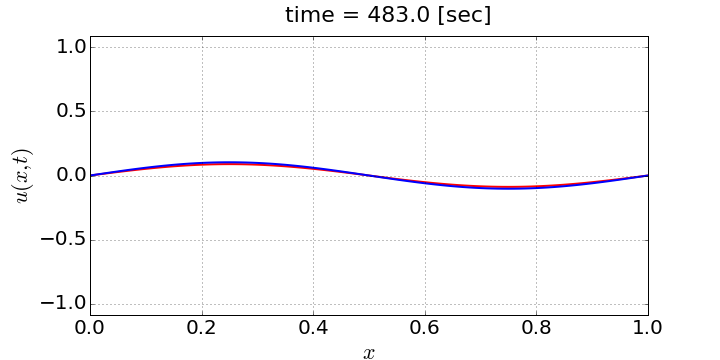
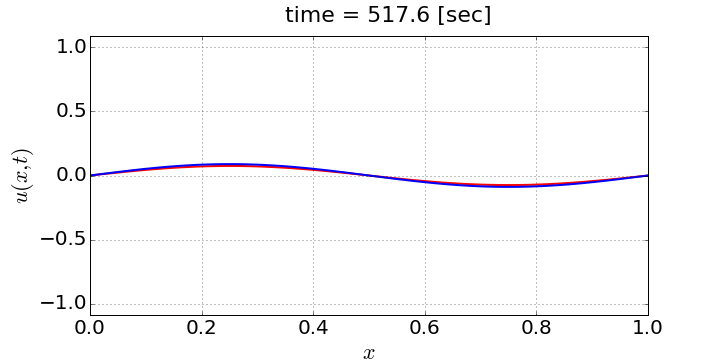
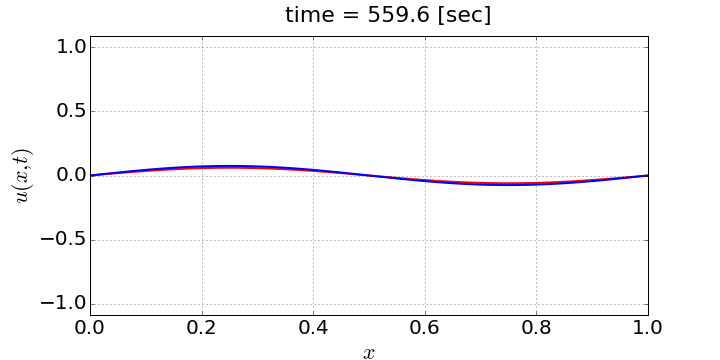
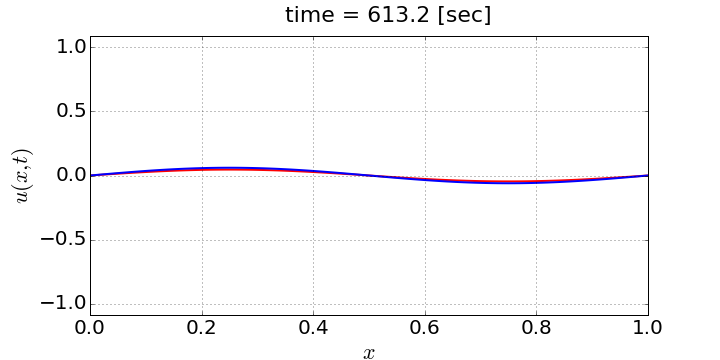
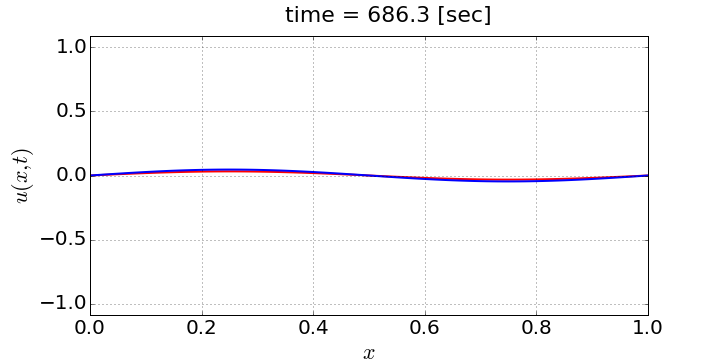

In [5]:
from JSAnimation import IPython_display
from matplotlib import animation

fig02 = plt.figure(1, figsize=(10, 5), dpi=90)
ax = plt.axes(xlim=(0, L), ylim=(min(u_sol[0]), max(u_sol[0])) )
ax.set_title("", fontsize=30, y=1.05)
ax.set_xlabel('$x$', fontsize=22)
ax.set_ylabel('$u(x,t)$', fontsize=22)
ax.grid()
time_text = ax.text(0.35, 1.05, '', transform=ax.transAxes)

colors = ['r', 'b']
numLine = 2
lines = [ax.plot([], [], lw=2, color=colors[j])[0] for j in range(numLine)]

def init():
    for line in lines:
        line.set_data([],[])
    time_text.set_text('')
    return lines, time_text

def animate(i):
    lines[0].set_data(x, u_sol_DS[i])
    lines[1].set_data(x, u_a[i])
    time_text.set_text('time = %.1f [sec]' % (times[i] * dt) )
    return lines, time_text

animation.FuncAnimation(fig02, animate, init_func=init,
                        frames=len(u_sol_DS), interval=50, blit=True)